## Xgboost train,testsetÏóêÏÑú Class 1Ï§ë ÌôïÎ•†Ïù¥ 0.3~0.6Ïù∏ sample extraction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.metrics import classification_report, precision_recall_curve, auc
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

import torch 
import os
import torch

import warnings
warnings.filterwarnings("ignore")

In [3]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')
print(device)

cuda


## 0.3~0.6 modeling

In [141]:
## Load original data
data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/Dataset/train_dataset.csv"
data = pd.read_csv(data_path, low_memory=False)

##load test data
test_data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/Dataset/test_dataset.csv"
test_data = pd.read_csv(test_data_path)

In [142]:
data_x = data.drop(columns='loan_status')
data_y = data[['loan_status']]

X_test = test_data.drop(columns='loan_status')
y_test = test_data[['loan_status']]

In [143]:
# data under 6:2:2 train,val,test set
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.33, random_state=42, stratify=data_y)

print(f"Train size: {X_train.shape[0]} samples ({X_train.shape[0]/len(data):.1%})")
print(f"Validation size: {X_val.shape[0]} samples ({X_val.shape[0]/len(data):.1%})")
print(f"Test size: {X_test.shape[0]} samples ({X_test.shape[0]/len(data):.1%})")

Train size: 997369 samples (67.0%)
Validation size: 491242 samples (33.0%)
Test size: 372153 samples (25.0%)


In [144]:
# ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîå Í∞úÏàò ÌôïÏù∏
print("Original class distribution:\n", y_train.value_counts())

# Ïñ∏ÎçîÏÉòÌîåÎßÅ Ï†ÅÏö© (Random Undersampling)
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

# Í≤∞Í≥º ÌôïÏù∏ (Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞)
print(f"Original data size: {data_x.shape[0]} samples")
print(f"Undersampled data size: {X_under.shape[0]} samples")

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ÄÌôò (ÌïÑÏöîÌïòÎ©¥)
data_under = pd.concat([pd.DataFrame(X_under, columns=data_x.columns), pd.DataFrame(y_under, columns=['loan_status'])], axis=1)

# Ïñ∏ÎçîÏÉòÌîåÎßÅ Î∞è Ïò§Î≤ÑÏÉòÌîåÎßÅ Í≤∞Í≥º ÌôïÏù∏
print(f"\nUndersampling imbalance check\n{data_under['loan_status'].value_counts()}")

Original class distribution:
 loan_status
0              802811
1              194558
Name: count, dtype: int64
Original data size: 1488611 samples
Undersampled data size: 389116 samples

Undersampling imbalance check
loan_status
0    194558
1    194558
Name: count, dtype: int64


In [145]:
X_train = data_under.drop(columns=['loan_status'])  # Feature (ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞)
y_train = data_under[['loan_status']]  # Target (ÌÉÄÍ≤ü Î≥ÄÏàò)

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

#pos, neg = y_test.value_counts()  # ‚úÖ `.values`Î°ú NumPy Î∞∞Ïó¥ Î≥ÄÌôò
#scale_pos_weight = neg / pos  # ÌÅ¥ÎûòÏä§ ÎπÑÏú® Í≥ÑÏÇ∞

# 1Ô∏è‚É£ XGBoost Î™®Îç∏ Ï†ïÏùò
model = XGBClassifier(
    #scale_pos_weight=scale_pos_weight, 
    n_estimators=1000,
    learning_rate=0.01,
    objective='binary:logistic',
    eval_metric="logloss",
    random_state=42,
    verbose = True
)

In [147]:
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Train & Validation Loss Ï†ÄÏû•
    verbose=True
)

[0]	validation_0-logloss:0.68687	validation_1-logloss:0.68689
[1]	validation_0-logloss:0.68072	validation_1-logloss:0.68076
[2]	validation_0-logloss:0.67468	validation_1-logloss:0.67475
[3]	validation_0-logloss:0.66877	validation_1-logloss:0.66886
[4]	validation_0-logloss:0.66297	validation_1-logloss:0.66309
[5]	validation_0-logloss:0.65728	validation_1-logloss:0.65743
[6]	validation_0-logloss:0.65170	validation_1-logloss:0.65188
[7]	validation_0-logloss:0.64622	validation_1-logloss:0.64644
[8]	validation_0-logloss:0.64084	validation_1-logloss:0.64110
[9]	validation_0-logloss:0.63557	validation_1-logloss:0.63587
[10]	validation_0-logloss:0.63040	validation_1-logloss:0.63073
[11]	validation_0-logloss:0.62531	validation_1-logloss:0.62569
[12]	validation_0-logloss:0.62033	validation_1-logloss:0.62075
[13]	validation_0-logloss:0.61543	validation_1-logloss:0.61590
[14]	validation_0-logloss:0.61062	validation_1-logloss:0.61113
[15]	validation_0-logloss:0.60590	validation_1-logloss:0.60646
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [148]:
# 5Ô∏è‚É£ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
#y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # ROC Curve & PRCÏóê ÌïÑÏöî

threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

X_test_df = X_test.copy()
X_test_df['y_prob'] = y_prob
X_test_df['y_pred'] = y_pred
X_test_df['actual'] = y_test.values

filtered = X_test_df[(X_test_df['actual'] == 1)&
                     (X_test_df['y_prob']>=0.3)&
                     (X_test_df['y_prob']<=0.6)]

filtered2 = X_test_df[(X_test_df['actual'] == 0)&
                      (X_test_df['y_pred'] == 1)&
                      (X_test_df['y_prob']>=0.5)]


print(f"‚ö†Ô∏è Ï°∞Í±¥Ïóê ÎßûÎäî ÏÉòÌîå Í∞úÏàò filtered 1: {len(filtered)}")
print(f"‚ö†Ô∏è Ï°∞Í±¥Ïóê ÎßûÎäî ÏÉòÌîå Í∞úÏàò filtered 2: {len(filtered2)}")
#display(filtered.head())  # Jupyter ÌôòÍ≤ΩÏù¥Î©¥ Ïù¥Î†áÍ≤å

‚ö†Ô∏è Ï°∞Í±¥Ïóê ÎßûÎäî ÏÉòÌîå Í∞úÏàò filtered 1: 4588
‚ö†Ô∏è Ï°∞Í±¥Ïóê ÎßûÎäî ÏÉòÌîå Í∞úÏàò filtered 2: 41063


In [18]:
test_data['loan_status'].value_counts()

loan_status
0    299557
1     72596
Name: count, dtype: int64

In [28]:
filtered.head()

last_fico_range_high  mo_sin_old_rev_tl_op  int_rate  annual_inc    dti  \
20                  579.0                 112.0    0.1153     38000.0  26.34   
31                  584.0                  39.0    0.1824     50300.0  20.07   
107                 559.0                 122.0    0.1399     56000.0  27.93   
168                 664.0                 183.0    0.1311     76000.0  25.69   
212                 629.0                 249.0    0.1333    245000.0  13.59   

     zip_code  installment  fico_range_low  total_rev_hi_lim  avg_cur_bal  \
20      846.0       277.12           660.0            9000.0       5176.0   
31       24.0       590.25           720.0            5900.0       6294.0   
107     483.0       239.21           665.0            3000.0       2336.0   
168     113.0       547.43           735.0          125600.0       7591.0   
212     891.0       802.29           680.0           57100.0      40926.0   

     bc_open_to_buy  revol_util  revol_bal  total_acc  credit_history_years  \
20      1801.000000       0.635     5713.0       10.0                    10   
31     11065.920936       0.201     1184.0       12.0                     3   
107        0.000000       0.970     3008.0       31.0                    11   
168    33170.000000       0.602    75614.0       19.0                    16   
212     1976.000000       0.806    46024.0       28.0                    21   

       y_prob  y_pred  actual  
20   0.463981       0       1  
31   0.452710       0       1  
107  0.502033       1       1  
168  0.435260       0       1  
212  0.401548       0       1

In [37]:
drop_columns = ['y_prob', 'y_pred', 'actual']
filtered = filtered.drop(columns=drop_columns)

In [38]:
filtered['loan_status'] = 1

In [39]:
path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/Dataset/"
filtered.to_csv(path_or_buf=path+"filtered_class1_0.3to0.6.csv", index=False)

## undersampling Ï†ÅÏö©

In [72]:
## Load original data
data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/Dataset/train_dataset.csv"
data = pd.read_csv(data_path, low_memory=False)

##load test data
test_data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/Dataset/test_dataset.csv"
test_data = pd.read_csv(test_data_path)

In [73]:
data_x = data.drop(columns='loan_status')
data_y = data[['loan_status']]

X_test = test_data.drop(columns='loan_status')
y_test = test_data[['loan_status']]

In [74]:
# data under 6:2:2 train,val,test set
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.33, random_state=42, stratify=data_y)

print(f"Train size: {X_train.shape[0]} samples ({X_train.shape[0]/len(data):.1%})")
print(f"Validation size: {X_val.shape[0]} samples ({X_val.shape[0]/len(data):.1%})")
print(f"Test size: {X_test.shape[0]} samples ({X_test.shape[0]/len(data):.1%})")

Train size: 997369 samples (67.0%)
Validation size: 491242 samples (33.0%)
Test size: 372153 samples (25.0%)


In [75]:
# ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîå Í∞úÏàò ÌôïÏù∏
print("Original class distribution:\n", y_train.value_counts())

# Ïñ∏ÎçîÏÉòÌîåÎßÅ Ï†ÅÏö© (Random Undersampling)
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

# Í≤∞Í≥º ÌôïÏù∏ (Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞)
print(f"Original data size: {data_x.shape[0]} samples")
print(f"Undersampled data size: {X_under.shape[0]} samples")

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ÄÌôò (ÌïÑÏöîÌïòÎ©¥)
data_under = pd.concat([pd.DataFrame(X_under, columns=data_x.columns), pd.DataFrame(y_under, columns=['loan_status'])], axis=1)

# Ïñ∏ÎçîÏÉòÌîåÎßÅ Î∞è Ïò§Î≤ÑÏÉòÌîåÎßÅ Í≤∞Í≥º ÌôïÏù∏
print(f"\nUndersampling imbalance check\n{data_under['loan_status'].value_counts()}")

Original class distribution:
 loan_status
0              802811
1              194558
Name: count, dtype: int64
Original data size: 1488611 samples
Undersampled data size: 389116 samples

Undersampling imbalance check
loan_status
0    194558
1    194558
Name: count, dtype: int64


In [76]:
X_train = data_under.drop(columns=['loan_status'])  # Feature (ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞)
y_train = data_under[['loan_status']]  # Target (ÌÉÄÍ≤ü Î≥ÄÏàò)

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

#pos, neg = y_test.value_counts()  # ‚úÖ `.values`Î°ú NumPy Î∞∞Ïó¥ Î≥ÄÌôò
#scale_pos_weight = neg / pos  # ÌÅ¥ÎûòÏä§ ÎπÑÏú® Í≥ÑÏÇ∞

# 1Ô∏è‚É£ XGBoost Î™®Îç∏ Ï†ïÏùò
model = XGBClassifier(
    #scale_pos_weight=scale_pos_weight, 
    n_estimators=1000,
    learning_rate=0.01,
    objective='binary:logistic',
    eval_metric="logloss",
    random_state=42,
    verbose = True
)

[0]	validation_0-logloss:0.68687	validation_1-logloss:0.68689
[1]	validation_0-logloss:0.68072	validation_1-logloss:0.68076
[2]	validation_0-logloss:0.67468	validation_1-logloss:0.67475
[3]	validation_0-logloss:0.66877	validation_1-logloss:0.66886
[4]	validation_0-logloss:0.66297	validation_1-logloss:0.66309
[5]	validation_0-logloss:0.65728	validation_1-logloss:0.65743
[6]	validation_0-logloss:0.65170	validation_1-logloss:0.65188
[7]	validation_0-logloss:0.64622	validation_1-logloss:0.64644
[8]	validation_0-logloss:0.64084	validation_1-logloss:0.64110
[9]	validation_0-logloss:0.63557	validation_1-logloss:0.63587
[10]	validation_0-logloss:0.63040	validation_1-logloss:0.63073
[11]	validation_0-logloss:0.62531	validation_1-logloss:0.62569
[12]	validation_0-logloss:0.62033	validation_1-logloss:0.62075
[13]	validation_0-logloss:0.61543	validation_1-logloss:0.61590
[14]	validation_0-logloss:0.61062	validation_1-logloss:0.61113
[15]	validation_0-logloss:0.60590	validation_1-logloss:0.60646
[1

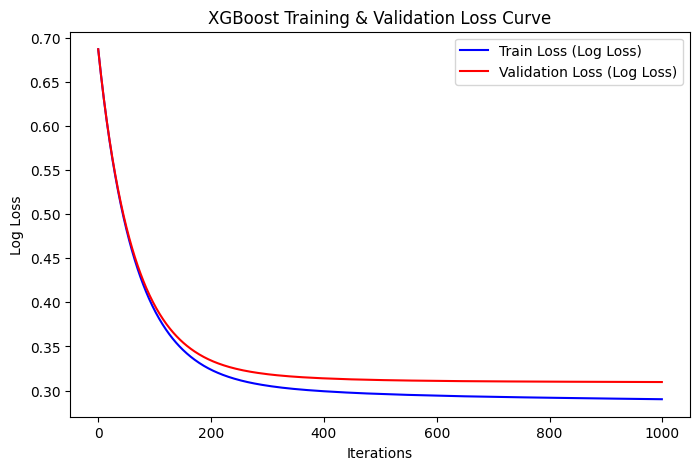

üîπ Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.92    299557
           1       0.62      0.91      0.73     72596

    accuracy                           0.87    372153
   macro avg       0.79      0.88      0.82    372153
weighted avg       0.90      0.87      0.88    372153



In [78]:
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Train & Validation Loss Ï†ÄÏû•
    verbose=True
)

# 3Ô∏è‚É£ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú Ï†ÄÏû•Îêú Train & Validation Loss Í∞ÄÏ†∏Ïò§Í∏∞
evals_result = model.evals_result()  # üîπ Î≥ÄÍ≤ΩÎêú ÏΩîÎìú (ÌïôÏäµ ÌõÑ Í≤∞Í≥º ÌôïÏù∏)
train_loss = evals_result['validation_0']['logloss']  # Training Loss
val_loss = evals_result['validation_1']['logloss']    # Validation Loss

# 4Ô∏è‚É£ Train & Validation Loss ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss (Log Loss)', color='blue')
plt.plot(val_loss, label='Validation Loss (Log Loss)', color='red')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Training & Validation Loss Curve')
plt.legend()
plt.show()

# 5Ô∏è‚É£ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
#y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # ROC Curve & PRCÏóê ÌïÑÏöî

threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

# üîπ Classification Report Ï∂úÎ†•
print("üîπ Classification Report:")
print(classification_report(y_test, y_pred))

## DatasetÏùÑ Ï§ÑÏó¨Î≥¥Ïûê
- Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÎßåÎì§Ïñ¥ÏßÑ 90Îßå Í∞ú Îç∞Ïù¥ÌÑ∞ Ï§ëÏóêÏÑú 30ÎßåÍ∞ú
- 0.3~0.6ÏúºÎ°ú ÎßåÎì§Ïñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ 20ÎßåÍ∞ú 
- class 0Îäî undersampling Ï†ÅÏö©

In [141]:
## Load original data
data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/Dataset/train_dataset.csv"
data = pd.read_csv(data_path, low_memory=False)

##load test data
test_data_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/Dataset/test_dataset.csv"
test_data = pd.read_csv(test_data_path)

In [210]:
data_x = data.drop(columns='loan_status')
data_y = data[['loan_status']]

X_test = test_data.drop(columns='loan_status')
y_test = test_data[['loan_status']]

In [221]:
# data under 6:2:2 train,val,test set
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.33, random_state=42, stratify=data_y)

print(f"Train size: {X_train.shape[0]} samples ({X_train.shape[0]/len(data):.1%})")
print(f"Validation size: {X_val.shape[0]} samples ({X_val.shape[0]/len(data):.1%})")
print(f"Test size: {X_test.shape[0]} samples ({X_test.shape[0]/len(data):.1%})")

Train size: 332759 samples (22.4%)
Validation size: 163897 samples (11.0%)
Test size: 372153 samples (25.0%)


In [222]:
y_train.value_counts()

loan_status
1              194558
0              138201
Name: count, dtype: int64

In [157]:
fake_path = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/tablegan/samples/train/train_OI_11_00_fake.csv"
fake = pd.read_csv(fake_path)
fake['loan_status'] = 1

In [8]:
##fake Îç∞Ïù¥ÌÑ∞ 50ÎßåÍ∞úÎ°ú Ï§ÑÏù¥Í∏∞
fake_50K = fake.sample(n = 400000, random_state=42).reset_index(drop=True)

In [172]:
len(fake)

900000

In [198]:
"""X_fake = fake_50K.drop(columns='loan_status')
y_fake = fake_50K[['loan_status']]"""

X_fake = fake.drop(columns='loan_status')
y_fake = fake[['loan_status']]

In [199]:
# 5Ô∏è‚É£ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
#y_pred = model.predict(X_fake)
y_prob = model.predict_proba(X_fake)[:, 1]  # ROC Curve & PRCÏóê ÌïÑÏöî

threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

X_fake_df = X_fake.copy()
X_fake_df['y_prob'] = y_prob
X_fake_df['y_pred'] = y_pred
X_fake_df['actual'] = y_fake.values

#0.5Ïù¥ÏÉÅÏù∏ Í≤ÉÎì§ ÌôïÏù∏Ïù∏
filtered_fake = X_fake_df[(X_fake_df['actual'] == 1)&
                     (X_fake_df['y_prob']>=0)&
                     (X_fake_df['y_prob']<=0.93)]

print(f"‚ö†Ô∏è Ï°∞Í±¥Ïóê ÎßûÎäî ÏÉòÌîå Í∞úÏàò: {len(filtered_fake)}")
display(filtered_fake.head())  # Jupyter ÌôòÍ≤ΩÏù¥Î©¥ Ïù¥Î†áÍ≤å

‚ö†Ô∏è Ï°∞Í±¥Ïóê ÎßûÎäî ÏÉòÌîå Í∞úÏàò: 506257


last_fico_range_high  mo_sin_old_rev_tl_op  int_rate  annual_inc    dti  \
5                  564.0                 244.0    0.1565     99337.0  12.48   
7                  544.0                 152.0    0.1209    198248.0  24.81   
8                  609.0                 385.0    0.1392    139375.0  28.96   
9                  499.0                 192.0    0.0962    198000.0  19.84   
12                 539.0                  88.0    0.1343     93363.0  21.78   

    zip_code  installment  fico_range_low  total_rev_hi_lim  avg_cur_bal  \
5      672.0       411.42           675.0           10079.0      20780.0   
7      338.0       621.19           680.0           28845.0       5208.0   
8      680.0       961.86           700.0           32170.0       6779.0   
9      890.0       335.00           670.0           18795.0      42355.0   
12     216.0       328.28           695.0           28130.0       4623.0   

    bc_open_to_buy  revol_util  revol_bal  total_acc  credit_history_years  \
5           1255.0       0.558     5985.0       17.0                  20.0   
7           2620.0       0.662    15150.0       21.0                  14.0   
8           2272.0       0.578    18205.0       36.0                  32.0   
9           1894.0       0.731    13462.0       28.0                  15.0   
12          1884.0       0.768    14562.0       32.0                  11.0   

      y_prob  y_pred  actual  
5   0.874683       1       1  
7   0.922788       1       1  
8   0.867636       1       1  
9   0.908951       1       1  
12  0.905865       1       1

In [200]:
drop_columns = ['y_prob', 'y_pred', 'actual']
filtered_fake = filtered_fake.drop(columns=drop_columns)

filtered_fake['loan_status'] = 1

In [201]:
fake_path2 = "C:/Users/GCU/Lending_club/Data_Analysis_lending-club/tablegan/samples/filter/filter_OI_11_00_fake.csv"
fake2 = pd.read_csv(fake_path2)
fake2['loan_status'] = 1

In [24]:
len(fake2)

500000

In [202]:
fake2_20K = fake2.sample(n = 100000, random_state=42).reset_index(drop=True)

In [57]:
"""X_fake2 = fake2.drop(columns='loan_status')
y_fake2 = fake2[['loan_status']]"""

"""# 5Ô∏è‚É£ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
#y_pred = model.predict(X_fake)
y_prob = model.predict_proba(X_fake2)[:, 1]  # ROC Curve & PRCÏóê ÌïÑÏöî

threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

X_fake_df2 = X_fake2.copy()
X_fake_df2['y_prob'] = y_prob
X_fake_df2['y_pred'] = y_pred
X_fake_df2['actual'] = y_fake2.values

#0.5Ïù¥ÏÉÅÏù∏ Í≤ÉÎì§ ÌôïÏù∏Ïù∏
filtered2 = X_fake_df2[(X_fake_df2['actual'] == 1)&
                     (X_fake_df2['y_prob']>=0.5)]

print(f"‚ö†Ô∏è Ï°∞Í±¥Ïóê ÎßûÎäî ÏÉòÌîå Í∞úÏàò: {len(filtered2)}")
display(filtered2.head())  # Jupyter ÌôòÍ≤ΩÏù¥Î©¥ Ïù¥Î†áÍ≤å"""

'# 5Ô∏è‚É£ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä\n#y_pred = model.predict(X_fake)\ny_prob = model.predict_proba(X_fake2)[:, 1]  # ROC Curve & PRCÏóê ÌïÑÏöî\n\nthreshold = 0.5\ny_pred = (y_prob >= threshold).astype(int)\n\nX_fake_df2 = X_fake2.copy()\nX_fake_df2[\'y_prob\'] = y_prob\nX_fake_df2[\'y_pred\'] = y_pred\nX_fake_df2[\'actual\'] = y_fake2.values\n\n#0.5Ïù¥ÏÉÅÏù∏ Í≤ÉÎì§ ÌôïÏù∏Ïù∏\nfiltered2 = X_fake_df2[(X_fake_df2[\'actual\'] == 1)&\n                     (X_fake_df2[\'y_prob\']>=0.5)]\n\nprint(f"‚ö†Ô∏è Ï°∞Í±¥Ïóê ÎßûÎäî ÏÉòÌîå Í∞úÏàò: {len(filtered2)}")\ndisplay(filtered2.head())  # Jupyter ÌôòÍ≤ΩÏù¥Î©¥ Ïù¥Î†áÍ≤å'

In [203]:
from sklearn.utils import shuffle

fake_total = pd.concat([filtered_fake, fake2_20K])
train_dataset = pd.concat([X_train, y_train], axis=1)

train_total = pd.concat([train_dataset,fake_total])
train_total = shuffle(train_total, random_state=42)

In [29]:
fake2['loan_status'].value_counts()

loan_status
1    500000
Name: count, dtype: int64

In [204]:
train_total['loan_status'].value_counts()

loan_status
0    802811
1    800815
Name: count, dtype: int64

In [205]:
X_train = train_total.drop(columns='loan_status')
y_train = train_total[['loan_status']]

In [192]:
# ÌÅ¥ÎûòÏä§Î≥Ñ ÏÉòÌîå Í∞úÏàò ÌôïÏù∏
print("Original class distribution:\n", y_train.value_counts())

# Ïñ∏ÎçîÏÉòÌîåÎßÅ Ï†ÅÏö© (Random Undersampling)
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

# Í≤∞Í≥º ÌôïÏù∏ (Í∞Å Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞)
print(f"Original data size: {data_x.shape[0]} samples")
print(f"Undersampled data size: {X_under.shape[0]} samples")

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ÄÌôò (ÌïÑÏöîÌïòÎ©¥)
data_under = pd.concat([pd.DataFrame(X_under, columns=data_x.columns), pd.DataFrame(y_under, columns=['loan_status'])], axis=1)

# Ïñ∏ÎçîÏÉòÌîåÎßÅ Î∞è Ïò§Î≤ÑÏÉòÌîåÎßÅ Í≤∞Í≥º ÌôïÏù∏
print(f"\nUndersampling imbalance check\n{data_under['loan_status'].value_counts()}")

Original class distribution:
 loan_status
0              802811
1              700815
Name: count, dtype: int64
Original data size: 1488611 samples
Undersampled data size: 1401630 samples

Undersampling imbalance check
loan_status
0    700815
1    700815
Name: count, dtype: int64


In [193]:
X_train = data_under.drop(columns=['loan_status'])  # Feature (ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞)
y_train = data_under[['loan_status']]  # Target (ÌÉÄÍ≤ü Î≥ÄÏàò)

In [223]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

#pos, neg = y_test.value_counts()  # ‚úÖ `.values`Î°ú NumPy Î∞∞Ïó¥ Î≥ÄÌôò
#scale_pos_weight = neg / pos  # ÌÅ¥ÎûòÏä§ ÎπÑÏú® Í≥ÑÏÇ∞

# 1Ô∏è‚É£ XGBoost Î™®Îç∏ Ï†ïÏùò
model2 = XGBClassifier(
    #scale_pos_weight=scale_pos_weight, 
    n_estimators=1000,
    learning_rate=0.01,
    objective='binary:logistic',
    eval_metric="logloss",
    random_state=42,
    verbose = True
)

[0]	validation_0-logloss:0.67333	validation_1-logloss:0.67332
[1]	validation_0-logloss:0.66804	validation_1-logloss:0.66803
[2]	validation_0-logloss:0.66284	validation_1-logloss:0.66282
[3]	validation_0-logloss:0.65774	validation_1-logloss:0.65771
[4]	validation_0-logloss:0.65276	validation_1-logloss:0.65272
[5]	validation_0-logloss:0.64785	validation_1-logloss:0.64781
[6]	validation_0-logloss:0.64304	validation_1-logloss:0.64299
[7]	validation_0-logloss:0.63833	validation_1-logloss:0.63827
[8]	validation_0-logloss:0.63369	validation_1-logloss:0.63363
[9]	validation_0-logloss:0.62915	validation_1-logloss:0.62908
[10]	validation_0-logloss:0.62469	validation_1-logloss:0.62462
[11]	validation_0-logloss:0.62031	validation_1-logloss:0.62022
[12]	validation_0-logloss:0.61601	validation_1-logloss:0.61592
[13]	validation_0-logloss:0.61179	validation_1-logloss:0.61169
[14]	validation_0-logloss:0.60764	validation_1-logloss:0.60753
[15]	validation_0-logloss:0.60357	validation_1-logloss:0.60346
[1

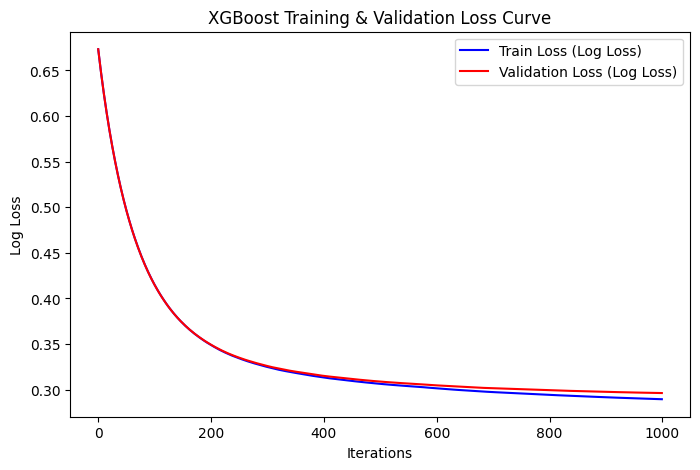

üîπ Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.26      0.40    299557
           1       0.21      0.83      0.34     72596

    accuracy                           0.37    372153
   macro avg       0.54      0.54      0.37    372153
weighted avg       0.73      0.37      0.38    372153



In [224]:
model2.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Train & Validation Loss Ï†ÄÏû•
    verbose=True
)

# 3Ô∏è‚É£ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú Ï†ÄÏû•Îêú Train & Validation Loss Í∞ÄÏ†∏Ïò§Í∏∞
evals_result = model2.evals_result()  # üîπ Î≥ÄÍ≤ΩÎêú ÏΩîÎìú (ÌïôÏäµ ÌõÑ Í≤∞Í≥º ÌôïÏù∏)
train_loss = evals_result['validation_0']['logloss']  # Training Loss
val_loss = evals_result['validation_1']['logloss']    # Validation Loss

# 4Ô∏è‚É£ Train & Validation Loss ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss (Log Loss)', color='blue')
plt.plot(val_loss, label='Validation Loss (Log Loss)', color='red')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('XGBoost Training & Validation Loss Curve')
plt.legend()
plt.show()

# 5Ô∏è‚É£ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
#y_pred = model.predict(X_test)
y_prob = model2.predict_proba(X_test)[:, 1]  # ROC Curve & PRCÏóê ÌïÑÏöî

threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

# üîπ Classification Report Ï∂úÎ†•
print("üîπ Classification Report:")
print(classification_report(y_test, y_pred))

# 6Ô∏è‚É£ ROC Curve & AUC-ROC Í≥ÑÏÇ∞
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)

# 7Ô∏è‚É£ Precision-Recall Curve & AU-PRC Í≥ÑÏÇ∞
precision, recall, _ = precision_recall_curve(y_test, y_prob)
auc_prc = auc(recall, precision)

In [98]:
from sklearn.metrics import confusion_matrix
# confusion matrix Í≥ÑÏÇ∞
cm = confusion_matrix(y_test, y_pred)

# Ìñâ: Ïã§Ï†úÍ∞í (y_test), Ïó¥: ÏòàÏ∏°Í∞í (y_pred)
# [[TP, FP],
#  [FN, TN]]
TN, FP, FN, TP= cm.ravel()

print("‚úÖ Confusion Matrix")
print(cm)
print(f"\nTrue Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

‚úÖ Confusion Matrix
[[267997  31560]
 [ 12153  60443]]

True Positives (TP): 60443
False Positives (FP): 31560
True Negatives (TN): 267997
False Negatives (FN): 12153


## 0.3~0.6Í≥º ÏõêÎûòÏùò fake Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÏÑù

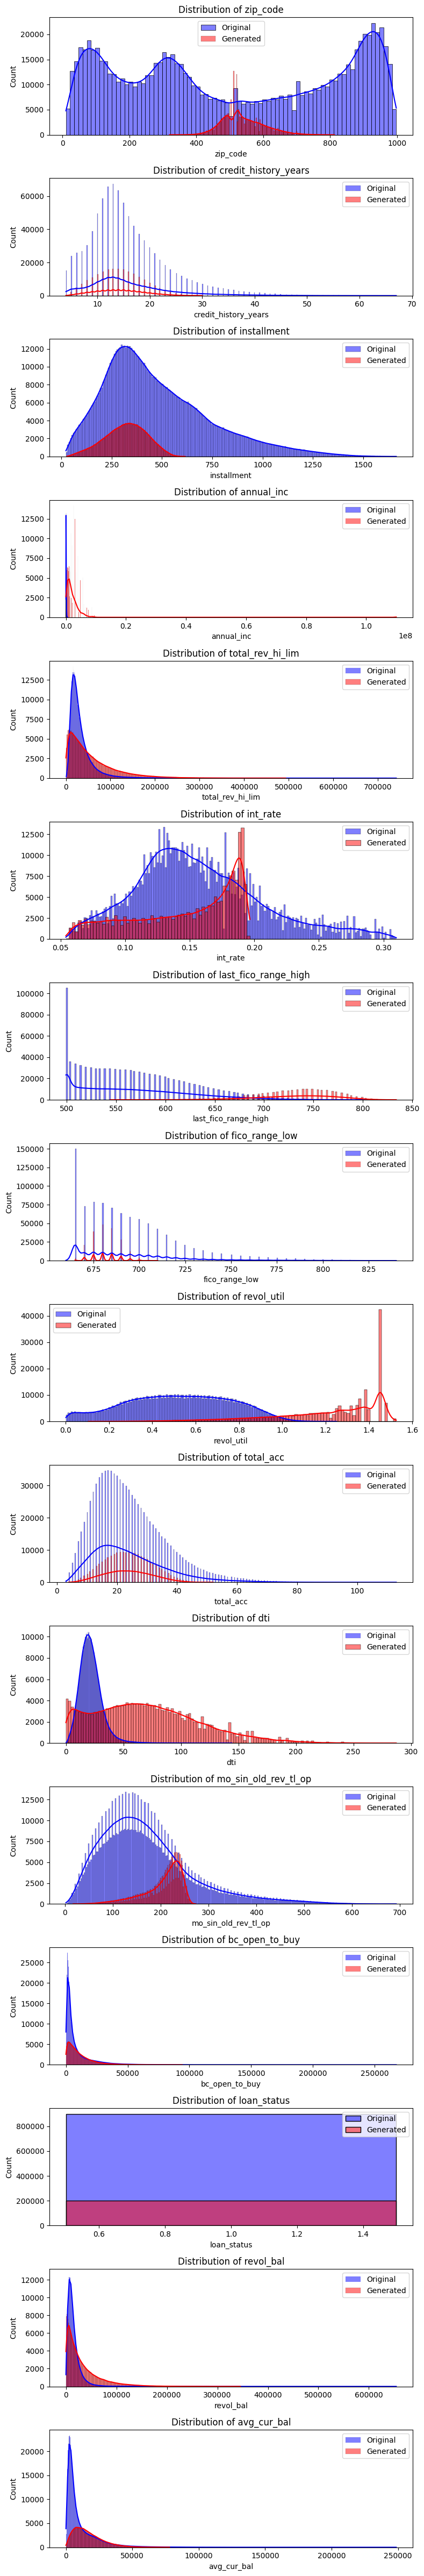

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏôÄ TableGAN ÏÉùÏÑ± Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞: original_df
# TableGANÏù¥ ÏÉùÏÑ±Ìïú Îç∞Ïù¥ÌÑ∞: generated_df

# Í≥µÌÜµ feature ÏÑ†ÌÉù (ÌòπÏãú Ïª¨ÎüºÏù¥ Îã§Î•º ÏàòÎèÑ ÏûàÏúºÎãà)
common_features = list(set(fake.columns) & set(fake2.columns))
original_df = fake[common_features]
generated_df = fake2[common_features]

# ------------------------------
# 1Ô∏è‚É£ ÌûàÏä§ÌÜ†Í∑∏Îû® ÎπÑÍµê (Í∞Å feature Î∂ÑÌè¨)
# ------------------------------
num_features = len(common_features)
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(8, num_features * 3))

for i, feature in enumerate(common_features):
    sns.histplot(original_df[feature], color='blue', label='Original', kde=True, ax=axes[i], alpha=0.5)
    sns.histplot(generated_df[feature], color='red', label='Generated', kde=True, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].legend()

plt.tight_layout()
plt.show()